Build a regression model and predict the per capita income fo canadian citizens in year 2020

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [49]:
df1 = pd.read_csv("canada_per_capita_income.csv")
df1.head()

year  per capita income (US$)
0  1970              3399.299037
1  1971              3768.297935
2  1972              4251.175484
3  1973              4804.463248
4  1974              5576.514583

In [50]:
x_train, x_test, y_train, y_test = train_test_split(df1[["year"]], df1[["per capita income (US$)"]], test_size=0.2)

In [51]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [52]:
reg.predict([[2020]])

/Users/utsavacharya/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[40751.51715415]])

In [53]:
reg.score(x_test, y_test)

0.927865046097723

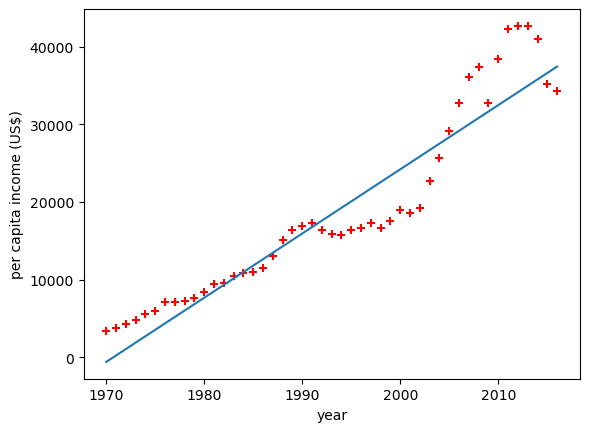

In [54]:
plt.scatter(df1["year"], df1["per capita income (US$)"], color = "red", marker = "+")
plt.xlabel("year")
plt.ylabel("per capita income (US$)")
plt.plot(df1["year"], reg.predict(df1[["year"]]))

 This file hiring.csv contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,

2 yr experience, 9 test score, 6 interview score

12 yr experience, 10 test score, 10 interview score

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from word2number.w2n import word_to_num

In [56]:
df1 = pd.read_csv("hiring.csv")
df1.head()

experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0        NaN                    8.0                           9      50000
1        NaN                    8.0                           6      45000
2       five                    6.0                           7      60000
3        two                   10.0                          10      65000
4      seven                    9.0                           6      70000

In [57]:
df1["experience"] = df1["experience"].fillna("zero")
df1["experience"] = df1["experience"].apply(word_to_num)
df1["experience"] = df1["experience"].replace(0, df1["experience"].median())
df1["test_score(out of 10)"] = df1["test_score(out of 10)"].fillna(df1["test_score(out of 10)"].median())
df1

experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0           4                    8.0                           9      50000
1           4                    8.0                           6      45000
2           5                    6.0                           7      60000
3           2                   10.0                          10      65000
4           7                    9.0                           6      70000
5           3                    7.0                          10      62000
6          10                    8.0                           7      72000
7          11                    7.0                           8      80000

In [58]:
reg = LinearRegression()
reg.fit(df1[["experience","test_score(out of 10)","interview_score(out of 10)"]],df1[["salary($)"]])

LinearRegression()

In [59]:
reg.predict([[2,9,6]]), reg.predict([[12,10,10]])


/Users/utsavacharya/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/utsavacharya/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(array([[46341.80249281]]), array([[94792.77433975]]))

1. From test_scores.csv, run gradient descent algorithm and find out the value of m, c and appropriate learning rate.
2. On each iteration compare the previous cost with the current cost. Stop when costs are similar.
3. Use sk_learn to find the actual m and c and compare them.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression

In [61]:
df1 = pd.read_csv("test_scores.csv")
df1.head()

name  math  cs
0   david    92  98
1   laura    56  68
2  sanjay    88  81
3     wei    70  80
4    jeff    80  83

In [62]:
def gradient_descent(x, y):
    m = 0
    c = 0
    n = len(x)
    learning_rate = 0.0002
    prev_cost = 0
    while True:
        y_predicted = m*x + c
        cost = (1/n)*sum((y_predicted - y)**2)
        md = (2/n)*sum(x*(y_predicted - y))
        cd = (2/n)*sum(y_predicted - y)
        m -= learning_rate*md
        c -= learning_rate*cd
        print(f"cost {cost} m {m} c {c} ")
        if math.isclose(prev_cost, cost):
            break
        prev_cost = cost

In [63]:
gradient_descent(df1["math"], df1["cs"])

cost 5199.1 m 1.9783600000000003 c 0.027960000000000002 
cost 4161.482445460163 m 0.20975041279999962 c 0.0030470367999999894 
cost 3332.2237319269248 m 1.7908456142986242 c 0.025401286955264 
cost 2669.4843523161976 m 0.37738163667530467 c 0.005499731626422651 
cost 2139.826383775145 m 1.6409848166378898 c 0.023373894401807944 
cost 1716.5264071567592 m 0.5113514173939655 c 0.0074774305434828076 
cost 1378.2272007804495 m 1.5212165764726306 c 0.021771129698498662 
cost 1107.8601808918404 m 0.6184191426785134 c 0.009075514323270572 
cost 891.7842215178443 m 1.4254981563597626 c 0.020507724625171385 
cost 719.0974036421305 m 0.7039868810749315 c 0.010370210797388455 
cost 581.0869686205 m 1.3490002310389348 c 0.01951553325074733 
cost 470.7897237271261 m 0.7723719384951477 c 0.01142244086408669 
cost 382.6407204862143 m 1.2878632281408475 c 0.018740093691150705 
cost 312.1924801681589 m 0.8270246840299113 c 0.012280892197750798 
cost 255.89060022344475 m 1.2390025969113474 c 0.018137880

In [64]:
reg = LinearRegression()
reg.fit(df1[["math"]], df1[["cs"]])

LinearRegression()

In [65]:
reg.coef_, reg.intercept_

(array([[1.01773624]]), array([1.91521931]))

Save the model

In [66]:
import joblib
joblib.dump(reg,"linear_model.joblib")

['linear_model.joblib']

In [67]:
reg = joblib.load("linear_model.joblib")
reg.predict([[90]])

/Users/utsavacharya/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[93.51148072]])

The file carprices.csv has car sell prices for 3 different models. First plot data points on a scatter plot chart to see if linear regression model can be applied. If yes, then build a model that can answer following questions,

1) Predict price of a mercedez benz that is 4 yr old with mileage 45000

2) Predict price of a BMW X5 that is 7 yr old with mileage 86000

3) Tell me the score (accuracy) of your model.

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [94]:
df1 = pd.read_csv("carprices.csv")
df1.head()

Car Model  Mileage  Sell Price($)  Age(yrs)
0    BMW X5    69000          18000         6
1    BMW X5    35000          34000         3
2    BMW X5    57000          26100         5
3    BMW X5    22500          40000         2
4    BMW X5    46000          31500         4

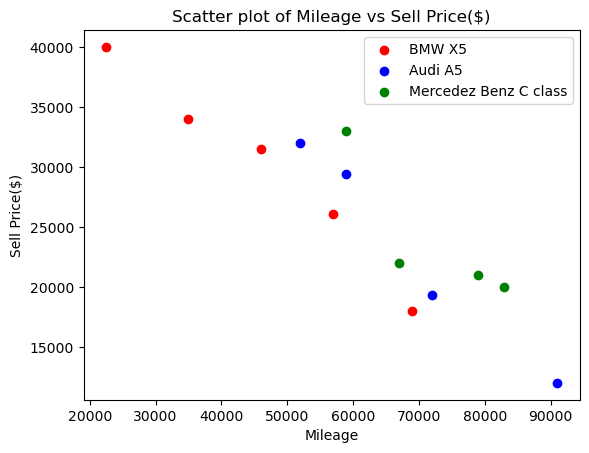

In [103]:
colors = {'BMW X5': 'red', 'Audi A5': 'blue', 'Mercedez Benz C class': 'green'}
for model, color in colors.items():
    subset = df1[df1['Car Model'] == model]
    plt.scatter(subset['Mileage'], subset['Sell Price($)'], color=color, marker='o', label=model)
plt.xlabel('Mileage')
plt.ylabel('Sell Price($)')
plt.title('Scatter plot of Mileage vs Sell Price($)')
plt.legend()
plt.show()


In [95]:
df2 = pd.get_dummies(df1["Car Model"])
df3 = pd.concat([df1, df2], axis=1)
df3 = df3.drop(["Car Model","Mercedez Benz C class"], axis=1)
df3

Mileage  Sell Price($)  Age(yrs)  Audi A5  BMW X5
0     69000          18000         6        0       1
1     35000          34000         3        0       1
2     57000          26100         5        0       1
3     22500          40000         2        0       1
4     46000          31500         4        0       1
5     59000          29400         5        1       0
6     52000          32000         5        1       0
7     72000          19300         6        1       0
8     91000          12000         8        1       0
9     67000          22000         6        0       0
10    83000          20000         7        0       0
11    79000          21000         7        0       0
12    59000          33000         5        0       0

In [96]:
x = df3.drop(["Sell Price($)"], axis=1)
y = df3[["Sell Price($)"]]

In [97]:
reg = LinearRegression()
reg.fit(x, y)

LinearRegression()

In [101]:
reg.predict([[45000, 4, 0, 0]])

/Users/utsavacharya/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[36991.31721061]])

In [99]:
reg.predict([[86000, 7, 0, 1]])

/Users/utsavacharya/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[11080.74313219]])

In [100]:
reg.score(x, y)

0.9417050937281082